# Problem Set 1, Part One: Due Thursday, January 23 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover Problems on Probability

#### Exercise 1.4.2:

If $P({\color{royalblue}{X}}{\mathbin{=}}0) = 0$,
$P({\color{royalblue}{X}}{\mathbin{=}}1) = 1/2$,
$P({\color{royalblue}{X}}{\mathbin{=}}2) = 1/4$,
$P({\color{royalblue}{X}}{\mathbin{=}}4) = 1/4$, find

**(a)** $E({\color{royalblue}{X}})$.

\begin{align}
E[X] &= 0 \cdot P(X=0) + 1 \cdot P(X=1) + 2 \cdot P(X=2) + 4 \cdot P(X=4) \\
     &= 0 \cdot 0 + 1 \cdot \frac{1}{2} + 2 \cdot \frac{1}{4} + 4 \cdot \frac{1}{4} \\
     &= 0 + \frac{1}{2} + \frac{2}{4} + \frac{4}{4} \\
     &= \frac{1}{2} + \frac{1}{2} + 1 \\
     &= 2
\end{align}
Therefore, $E[X] = 2$

**(b)**
$\operatorname{Var}({\color{royalblue}{X}})$.

\begin{align}
E[X^2] &= 0^2 \cdot P(X=0) + 1^2 \cdot P(X=1) + 2^2 \cdot P(X=2) + 4^2 \cdot P(X=4) \\
              &= 0 \cdot 0 + 1 \cdot 0.5 + 4 \cdot 0.25 + 16 \cdot 0.25 \\
              &= 0.5 + 1 + 4 \\
              &= 5.5
\end{align}

\begin{align}
\text{Var}[X] &= E[X^2] - E[X]^2 \\
              &= 5.5 - 2 \\
              &= 3.5
\end{align}

 **(c)**
$E(-{\color{royalblue}{X}})$.

\begin{align}
E[-X] &= 0 \cdot P(X=0) - 1 \cdot P(X=1) - 2 \cdot P(X=2) - 4 \cdot P(X=4) \\
     &= 0 \cdot 0 - 1 \cdot \frac{1}{2} - 2 \cdot \frac{1}{4} - 4 \cdot \frac{1}{4} \\
     &= 0 - \frac{1}{2} - \frac{2}{4} - \frac{4}{4} \\
     &= -\frac{1}{2} - \frac{1}{2} - 1 \\
     &= -2
\end{align}
Therefore, $E[X] = -2$

**(d)** The median.

\begin{align}
P(X \geq x) &\geq 0.5, P(X \leq x) \geq 0.5 \\
P(X \geq 1) &= 0.5, P(X \leq 1) = 0.5
\end{align}
Therefore the median is 1.

**(e)** The upper quartile.

\begin{align}
P(X \geq x) &\geq 0.25, P(X \leq x) \geq 0.75 \\
P(X \geq 2) &= 0.25, P(X \leq 2) = 0.75 \\
\end{align}
Therefore the upper quartile is 2.

**(f)** The thirty-seventh percentile.

\begin{align}
P(X \geq x) &\geq 0.63, P(X \leq x) \geq 0.37 \\
P(X \geq 1) &= 0.5, P(X \leq 1) = 0.5 \\
\end{align}

The thirty-seventh percentile would fall somewhere between 0 and 1.
Because we are dealing with discete space, the thirty-seventh pertile would therefore be 1.

#### Exercise 1.5.10:

Let ${\color{royalblue}{X}}$ be the number of consumers who visit the Dairy
Queen in Plains, Texas, at least once during October. Assume there are
2000 people living in Plains, and each has a probability $0.25$ of
visiting the Dairy Queen, independent of one another. Estimate
$P(460{\mathbin{<}}{\color{royalblue}{X}}{\mathbin{<}}540)$.

$X$ follows a Binomial$(n=2000, p=0.25)$ distribution

Binomial$(n=2000, p=0.25) \approx N(\mu_X, \sigma_X)$

$\mu_X = np = 2000 \times 0.25 = 500$

$\sigma_X = \sqrt{np(1-p)} = \sqrt{2000 \times 0.25 \times 0.75} = \sqrt{375}$

$P(460 < X < 540) = P(X < 540) - P(X \leq 460)$

In [3]:
z1 = (540-500) / 375**0.5
z2 = (460-500) / 375**0.5

print(z1, z2)

p1 = stats.norm.cdf(z1)
p2 = stats.norm.cdf(z2)

print(p1, p2)
print(p1-p2)

2.0655911179772892 -2.0655911179772892
0.9805664480937915 0.019433551906208595
0.9611328961875829


Therefore, $P(460 < X < 540) \approx 0.9806 - 0.0194 = 0.9611$

#### Review Problem 1.6.2:

A balanced coin is tossed eight times. What is the probability of
getting exactly two heads if we are given the information that there
were at least two heads in the eight tosses?

$P(\;2 \text{ H } |\text{ at least 2 H }) = \frac{P(\;2 \text{ H } \cap \text{ at least 2 H })}{P(\text{ at least 2 H })}$

In [4]:
p_intersect = stats.binom.pmf(k=2, n=8, p=0.5)

p_total = 1.0
p_0 = stats.binom.pmf(k=0, n=8, p=0.5)
p_1 = stats.binom.pmf(k=1, n=8, p=0.5)

print(p_intersect, p_total, p_0, p_1)
print(p_intersect / (p_total - p_0 - p_1))

0.10937500000000004 1.0 0.003906250000000007 0.031249999999999983
0.11336032388663972


Therefore, $P(\;2 \text{ H } |\text{ at least 2 H }) = 0.1137$

#### Review Problem 1.6.3:

Consider five dice being rolled, and ${\color{royalblue}{X}}$ equals the sum
of the numbers (1 through 6) on the five dice. If the dice are balanced
(i.e., equal probabilities of getting 1 through 6 for each die) and
independent of each other, find the mean and the variance of
${\color{royalblue}{X}}$.

\begin{align}
E[X_i] &= 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6} \\
       &= 3.5
\end{align}

\begin{align}
E[X_i^2] &= 1^2 \cdot \frac{1}{6} + 2^2 \cdot \frac{1}{6} + 3^2 \cdot \frac{1}{6} + 4^2 \cdot \frac{1}{6} + 5^2 \cdot \frac{1}{6} + 6^2 \cdot \frac{1}{6} \\
       &\approx 15.17
\end{align}

\begin{align}
\text{Var}[X] &= E[X_i^2] - E[X_i]^2 \\
              &= 15.17 - 3.5^2 \\
              &= 2.92
\end{align}

\begin{align}
E[Y] &= E[X_1 + X_2 + X_3 + X_4 + X_5] \\
     &= E[X_1] + E[X_2] + E[X_3] + E[X_4] + E[X_5] \\
     &= 3.5 + 3.5 + 3.5 + 3.5 + 3.5 \\
     &= 5 \cdot 3.5 \\
     &= 17.5 
\end{align}

\begin{align}
\text{Var}[Y] &= \text{Var}[X_1 + X_2 + X_3 + X_4 + X_5] \\
     &= \text{Var}[X_1] + \text{Var}[X_2] + \text{Var}[X_3] + \text{Var}[X_4] + \text{Var}[X_5] \\
     &= 2.92 + 2.92 + 2.92 + 2.92 + 2.92 \\
     &= 5 \cdot 2.92 \\
     &= 14.6
\end{align}

### Conover Problems on Statistical Inference

#### Exercise 2.2.2:

In five consecutive games a certain basketball team had scores of 73,
68, 86, 78 and 65.

**(a)** Draw a graph of the empirical distribution function.

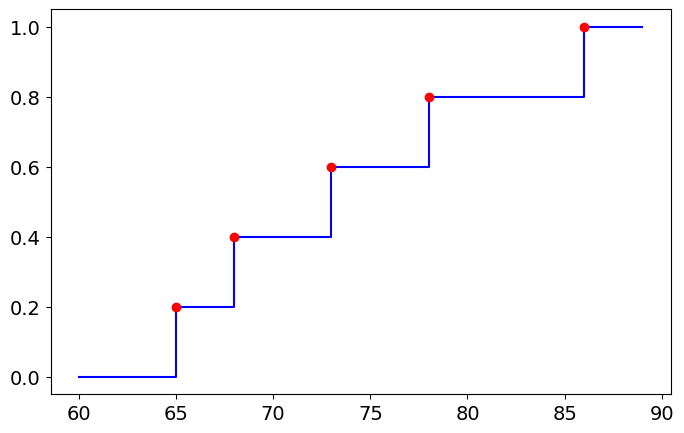

In [6]:
scores = np.array([73, 68, 86, 78, 65])
x_range = np.arange(60, 90)
y_cdf = np.array([np.mean(scores <= x) for x in x_range])

plt.step(x, y_cdf, 'b-', where='post');
plt.plot(scores, [np.mean(scores <= x) for x in scores], 'ro');

**(b)** Find the upper sample quartile.

\begin{align}
P(X \geq x) \geq 0.25&, P(X \leq x) \geq 0.75 \\
P(X \geq 78) = 0.2&, P(X \leq 78) = 0.8
\end{align}

The upper sample quantile would fall somewhere between 73 and 78.
Because we are dealing with discete space, the upper sample quantile would therefore be 78.

**(c)** Find the sample interquartile range.

\begin{align}
P(X \geq x) \geq 0.75&, P(X \leq x) \geq 0.25 \\
P(X \geq 68) = 0.6&, P(X \leq 68) = 0.4
\end{align}

The lower sample quantile would fall somewhere between 65 and 68.
Because we are dealing with discete space, the lower sample quantile would therefore be 68.

\begin{align}
IQR &= Q_3 - Q_1 \\
    &= 78 - 68 \\
    &= 10
\end{align}

Therefore, the sample interquartile range is 10 points.

**(d)** Find the sample mean.

\begin{align}
\bar{x} &= \frac{1}{n}\sum_{i=0}^n x_i\\
     &= \frac{73 + 68 + 86 + 78 + 65}{5} \\
     &= 74
\end{align}

**(e)** Find the sample standard deviation.

\begin{align}
s &= \sqrt{\frac{\sum_{i=1}^n (x_i - \mu)^2}{n-1}} \\
  &= \sqrt{\frac{(73-74)^2 + (68-74)^2 + (86-74)^2 + (78-74)^2 + (65-74)^2}{4}} \\
  &= \sqrt{\frac{1 + 36 + 144 + 16 + 81}{4}} \\
  &= \sqrt{\frac{278}{4}} \\
  &= \sqrt{69.5} \\
  &\approx 8.337
\end{align}

#### Exercise 2.2.8:

An academic skills test was given to a random sample of 50 seniors at
Central High School. The average score was 81% and the standard
deviation was 11%. Find a 95% confidence interval for the average score
of all 1159 seniors at Central High School.

In [7]:
n = 50
mu = 0.81
std = 0.11

z1 = stats.norm.ppf(0.025)
z2 = stats.norm.ppf(0.975)

print(z1, z2)

-1.9599639845400545 1.959963984540054


\begin{align}
\text{CI}_{0.95} &= \mu \pm z_{0.025} \frac{s}{\sqrt{n}} \\
          &= 0.81 \pm 1.96 \cdot \frac{0.11}{\sqrt{1159}}
\end{align}

In [8]:
lower = 0.81 + z1 * (std / n**0.5)
upper = 0.81 + z2 * (std / n**0.5)

print(lower, upper)

0.7795101158643072 0.8404898841356929


Therefore, the CI for the average score of all 1159 seniors is bounded by $[0.7795, 0.8404]$.